# Importando Bibliotecas

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns
import re
import os

from ydata_profiling import ProfileReport
import sweetviz as sv

# Carregando e inspecionando dados

In [59]:
data = pd.read_csv("./data/card_transdata.csv", na_values=[' ', '_', '_______'], low_memory=False)

# Remoção dos valores que não são fraudes

In [60]:
# Remover todas as linhas onde 'fraud' é igual a 0
data = data[data['fraud'] != 0]

# Redefinir o índice do DataFrame
data.reset_index(drop=True, inplace=True)

In [61]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
87398,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
87399,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
87400,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
87401,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


# Removendo a coluna 'fraud''

In [62]:
data = data.drop('fraud', axis=1)

In [63]:
# Mostra as primeiras 5 linhas
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0


In [64]:
# Obtendo informações sobre cada variável
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87403 entries, 0 to 87402
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              87403 non-null  float64
 1   distance_from_last_transaction  87403 non-null  float64
 2   ratio_to_median_purchase_price  87403 non-null  float64
 3   repeat_retailer                 87403 non-null  float64
 4   used_chip                       87403 non-null  float64
 5   used_pin_number                 87403 non-null  float64
 6   online_order                    87403 non-null  float64
dtypes: float64(7)
memory usage: 4.7 MB


In [65]:
# número de colunas
print(f'columns: {data.shape[1]}')

# número de linhas
print(f'rows: {data.shape[0]}')

columns: 7
rows: 87403


# Limpeza de dados

## 1. Valores ausentes

In [66]:
# Verifique a soma dos valores ausentes para cada coluna
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

## 2. Valores duplicados

In [67]:
# Verifique a soma das linhas duplicadas
print(f'duplicate rows: {data.duplicated().sum()}')

duplicate rows: 0


O conjunto de dados NÃO tem linhas duplicadas

# Algumas informações estatísticas

In [68]:
# Criando uma tabela de estatísticas descritivas para dados
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000


# Correlação de dados

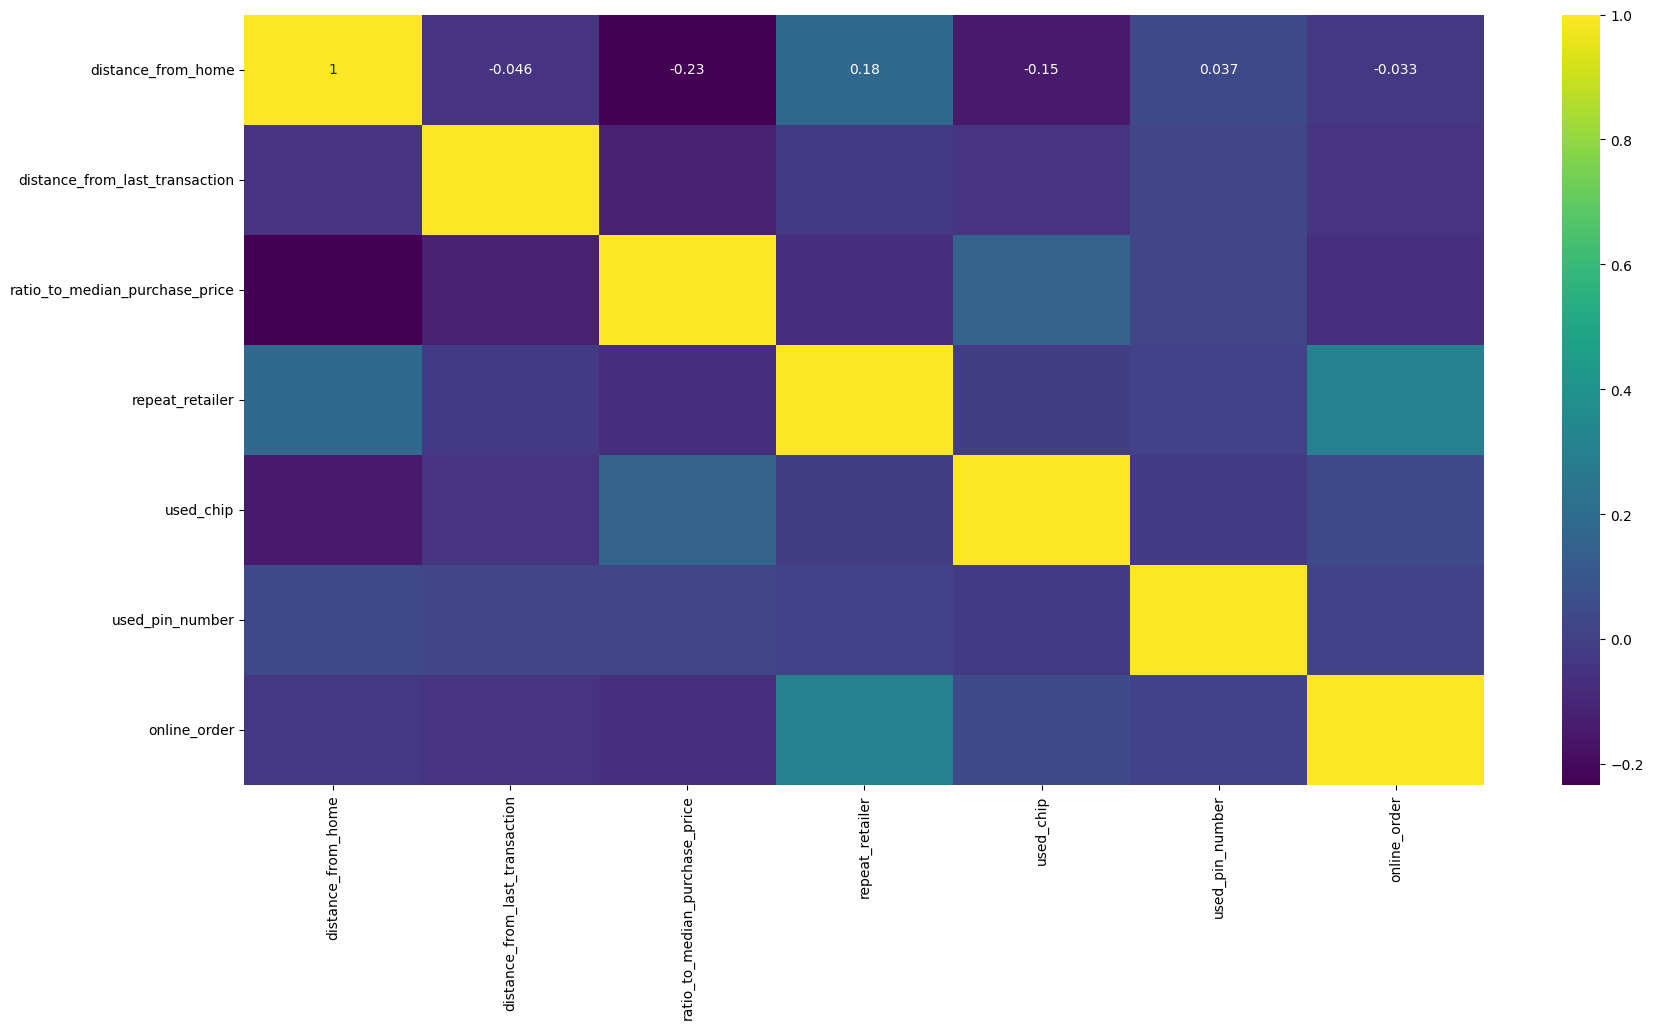

In [69]:
# Mapa de calor para explicar a correlação entre os recursos
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

In [70]:
# Criar a tabela de correlação
correlation_table = data.corr()

# Exibir a tabela de correlação
correlation_table

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
distance_from_home,1.000000,-0.046425,-0.233173,0.178962,-0.150339,0.037152,-0.033292
distance_from_last_transaction,-0.046425,1.000000,-0.121874,-0.026591,-0.046588,0.025879,-0.045565
ratio_to_median_purchase_price,-0.233173,-0.121874,1.000000,-0.074130,0.156148,0.018750,-0.060553
repeat_retailer,0.178962,-0.026591,-0.074130,1.000000,-0.012298,0.011821,0.297630
used_chip,-0.150339,-0.046588,0.156148,-0.012298,1.000000,-0.028643,0.045574
used_pin_number,0.037152,0.025879,0.018750,0.011821,-0.028643,1.000000,0.012422
online_order,-0.033292,-0.045565,-0.060553,0.297630,0.045574,0.012422,1.000000


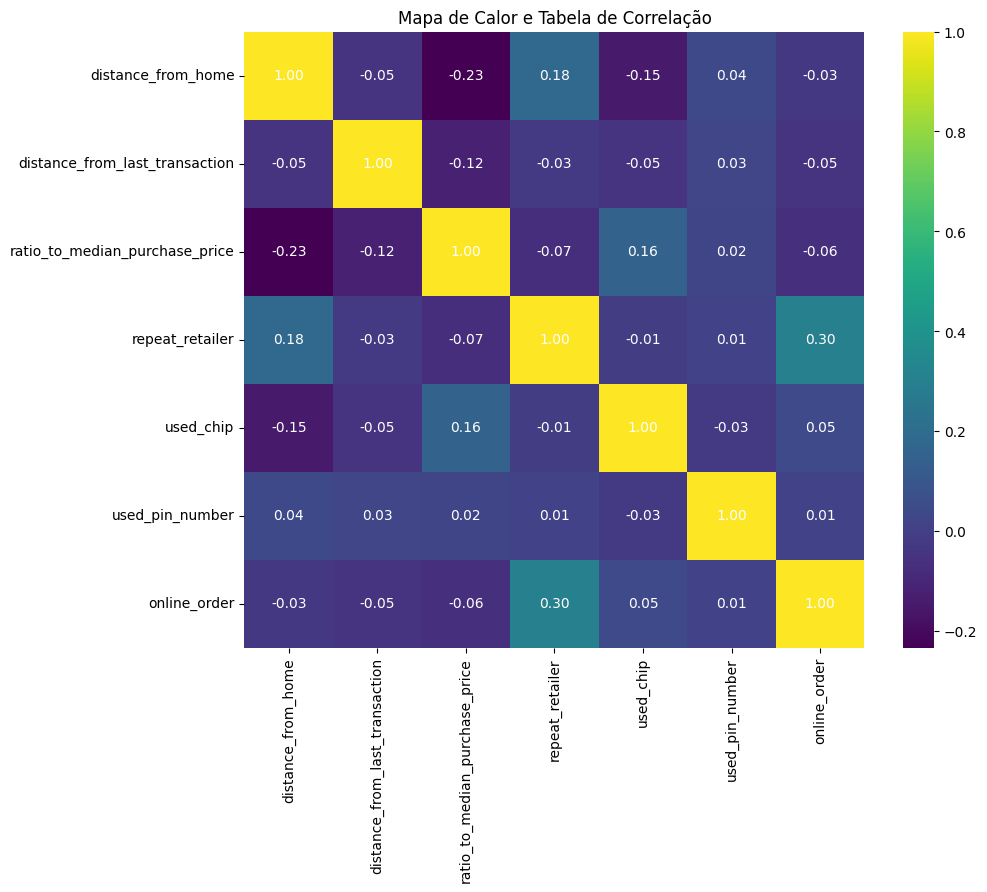

In [71]:
# Criar o mapa de calor
plt.figure(figsize=(10, 8))

# Plotar o mapa de calor
sns.heatmap(correlation_table, cmap='viridis', fmt='.2f')

# Adicionar a tabela de correlação como texto
for i in range(len(correlation_table)):
    for j in range(len(correlation_table.columns)):
        plt.text(j+0.5, i+0.5, '{:.2f}'.format(correlation_table.iloc[i, j]), ha='center', va='center', color='white')

plt.title('Mapa de Calor e Tabela de Correlação')
plt.show()

# Análise Exploratória de Dados (EDA)

#### • Análise Univariada

#### • Análise Bi-variada

## 1. Análise Univariada

In [88]:
# Crie uma lista contendo recursos categóricos
cat_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

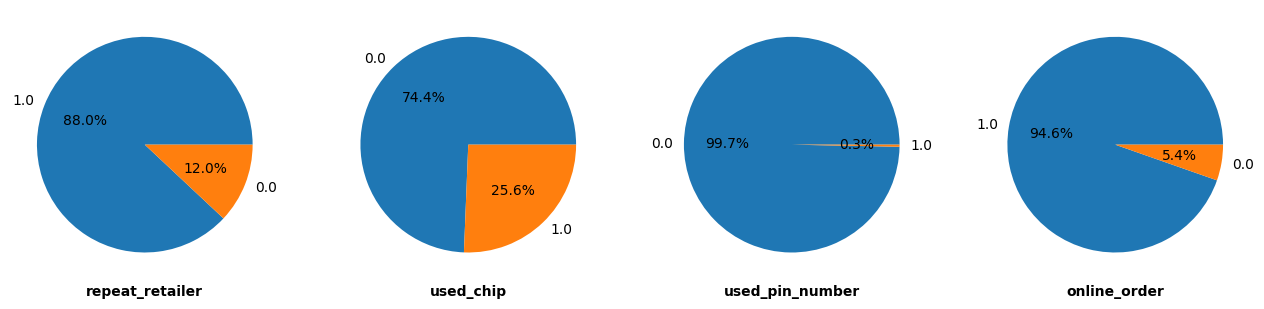

In [89]:
# Desenhar um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize = (16, 12))
for i, col in enumerate(cat_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = data[col].value_counts().values, 
            labels = data[col].value_counts().index, 
            autopct = '%1.1f%%')
    plt.xlabel(col, weight = 'bold')
plt.show()